In [187]:
import pandas as pd
from sklearn.svm import OneClassSVM
# from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler,PowerTransformer
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as ex

In [188]:
df=pd.read_csv('df.csv')

In [189]:
df.head()

,Unnamed: 0,Open,High,Low,Close,Volume,SHigh,encoded_stock
0,0,19.468005,19.613361,19.468005,19.516457,4253200,0.000066,6
1,1,19.303269,19.390482,19.196674,19.245127,6914100,0.000064,6
2,2,19.438932,19.574599,19.371100,19.555218,7591100,0.000066,6
3,3,19.642432,19.700574,19.564909,19.681192,5247500,0.000067,6
4,4,19.719955,19.942834,19.632741,19.836239,5516600,0.000070,6


In [190]:
df.columns

Index(['Unnamed: 0', 'Open', 'High', 'Low', 'Close', 'Volume', 'SHigh',
       'encoded_stock'],
      dtype='object')

In [191]:
df.dtypes

Unnamed: 0         int64
Open             float64
High             float64
Low              float64
Close            float64
Volume             int64
SHigh            float64
encoded_stock      int64
dtype: object

In [192]:
df=df.drop(columns='Unnamed: 0')

In [193]:
df.isna().sum()

Open             0
High             0
Low              0
Close            0
Volume           0
SHigh            0
encoded_stock    0
dtype: int64

In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3751 entries, 0 to 3750
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Open           3751 non-null   float64
 1   High           3751 non-null   float64
 2   Low            3751 non-null   float64
 3   Close          3751 non-null   float64
 4   Volume         3751 non-null   int64  
 5   SHigh          3751 non-null   float64
 6   encoded_stock  3751 non-null   int64  
dtypes: float64(5), int64(2)
memory usage: 205.3 KB


In [195]:
df.describe()

,Open,High,Low,Close,Volume,SHigh,encoded_stock
count,3751.000000,3751.000000,3751.000000,3751.000000,3.751000e+03,3751.000000,3751.000000
mean,11729.685699,11926.780167,11535.219287,11737.039187,4.408667e+09,0.109204,6.510797
std,26649.820658,27100.190014,26200.630610,26665.334103,1.406217e+10,0.248392,4.053026
min,12.270000,12.360000,12.120000,12.330000,1.486950e+05,0.000000,0.000000
25%,119.170925,121.512099,116.699997,119.036812,7.449900e+06,0.001000,3.000000
50%,181.322212,183.792164,178.412717,180.965210,2.024720e+07,0.001571,7.000000
75%,570.225016,576.594890,564.199906,571.778778,2.177989e+08,0.005172,10.000000
max,106147.296875,109114.882812,105291.734375,106146.265625,1.492189e+11,1.000000,13.000000


In [196]:
df.size

26257

In [197]:
df.shape

(3751, 7)

array([[<Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'High'}>,
        <Axes: title={'center': 'Low'}>],
       [<Axes: title={'center': 'Close'}>,
        <Axes: title={'center': 'Volume'}>,
        <Axes: title={'center': 'SHigh'}>],
       [<Axes: title={'center': 'encoded_stock'}>, <Axes: >, <Axes: >]],
      dtype=object)

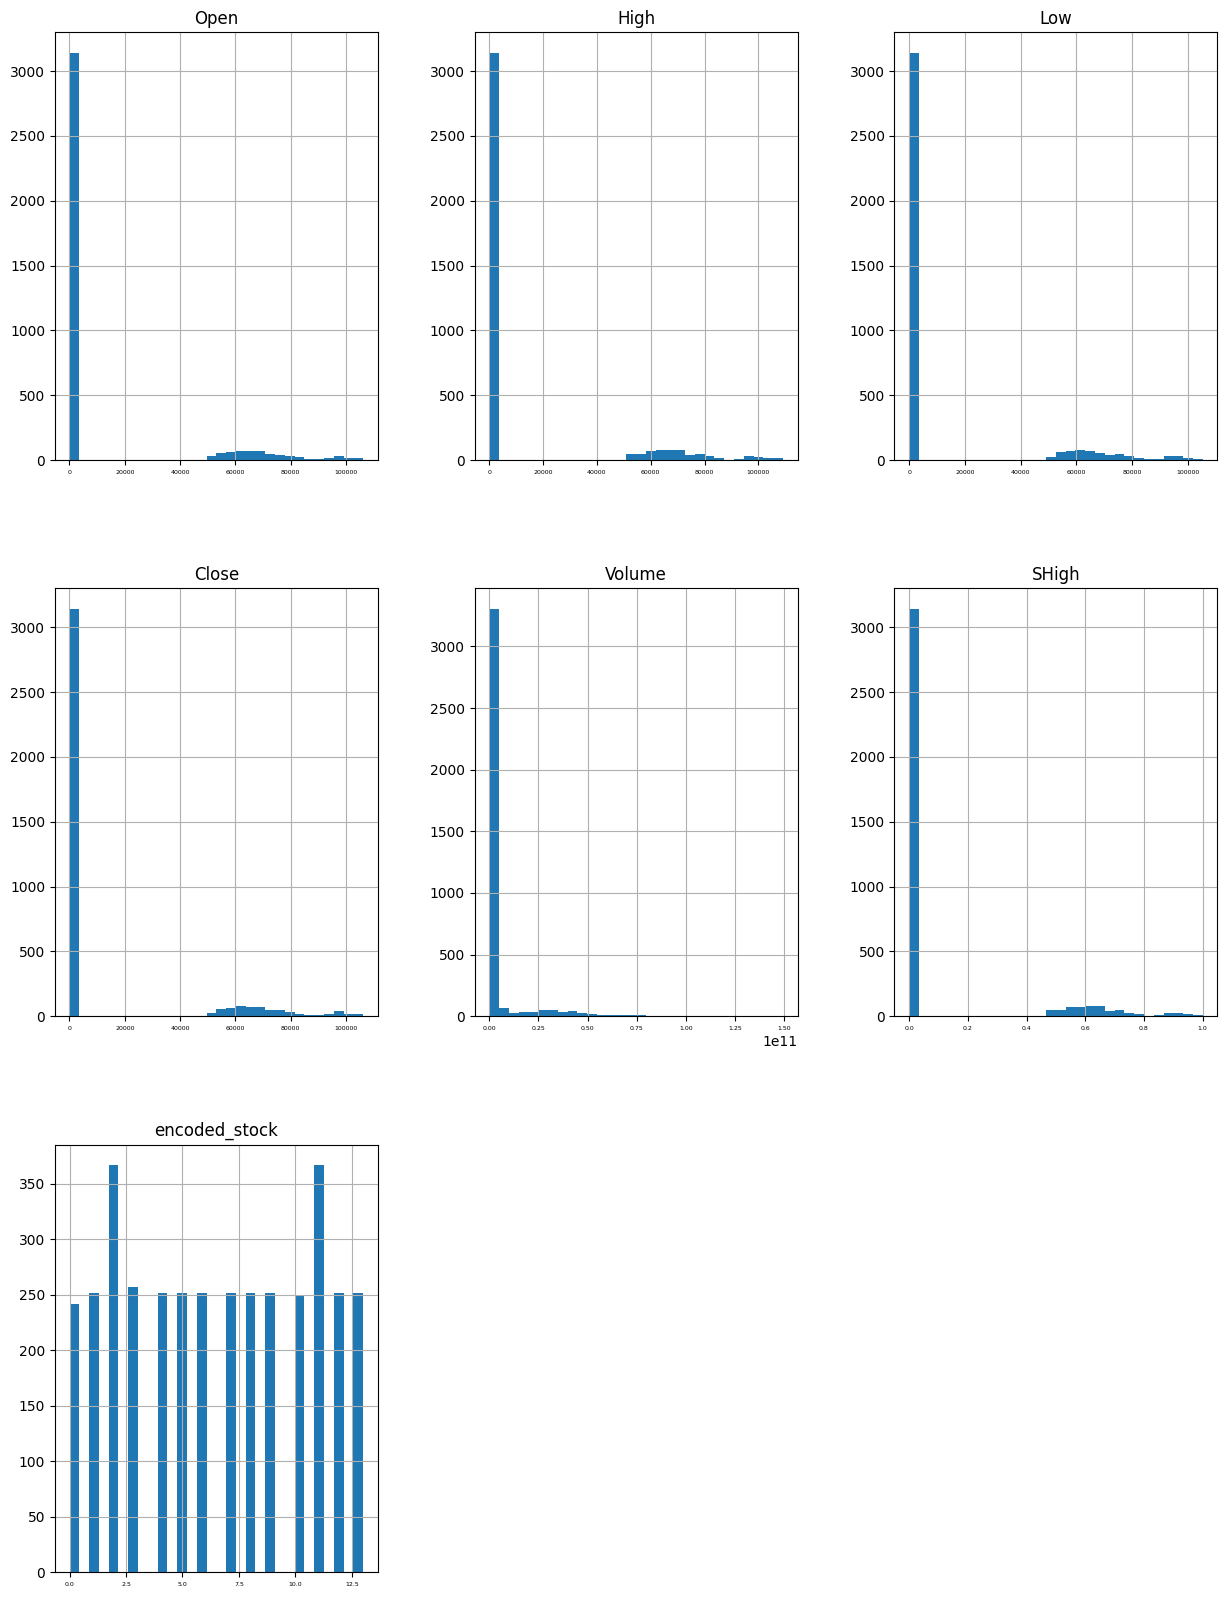

In [198]:
import matplotlib.pyplot as plt
df.hist(column=df.columns,bins=30,figsize=(15,20),grid=True,xlabelsize=4.5)

In [199]:
#transform
pt=PowerTransformer(method="yeo-johnson")
pt.set_output(transform="pandas")
dft=pt.fit_transform(df)

In [200]:
dft

,Open,High,Low,Close,Volume,SHigh,encoded_stock
0,-1.657729,-1.659460,-1.649440,-1.655400,-0.823956,-0.512049,-0.031442
1,-1.664954,-1.669156,-1.661396,-1.667301,-0.610313,-0.512117,-0.031442
2,-1.658999,-1.661137,-1.653688,-1.653715,-0.570495,-0.512061,-0.031442
3,-1.650155,-1.655701,-1.645217,-1.648268,-0.730223,-0.512022,-0.031442
4,-1.646814,-1.645359,-1.642275,-1.641618,-0.708218,-0.511949,-0.031442
...,...,...,...,...,...,...,...
3746,-0.076237,-0.060955,-0.073400,-0.056006,1.251967,-0.457502,1.072216
3747,-0.055897,-0.044055,-0.061824,-0.053597,1.330327,-0.455584,1.072216
3748,-0.053459,-0.040077,-0.055919,-0.053975,1.372865,-0.455122,1.072216
3749,-0.053832,-0.047544,-0.058833,-0.060380,1.362093,-0.455986,1.072216


In [201]:
scaler = MinMaxScaler()
# scaled_data = scaler.fit_transform(df)
scaler.set_output(transform="pandas")
scaled_data = scaler.fit_transform(dft)

In [202]:
scaled_data

,Open,High,Low,Close,Volume,SHigh,encoded_stock
0,0.105761,0.105442,0.108733,0.105256,0.390257,0.000793,0.542269
1,0.103880,0.102919,0.105624,0.102154,0.436078,0.000769,0.542269
2,0.105431,0.105005,0.107628,0.105695,0.444618,0.000789,0.542269
3,0.107733,0.106420,0.109831,0.107115,0.410361,0.000802,0.542269
4,0.108603,0.109110,0.110596,0.108848,0.415080,0.000829,0.542269
...,...,...,...,...,...,...,...
3746,0.517471,0.521285,0.518568,0.522148,0.835490,0.020382,0.878066
3747,0.522766,0.525681,0.521578,0.522776,0.852296,0.021071,0.878066
3748,0.523401,0.526716,0.523114,0.522677,0.861420,0.021237,0.878066
3749,0.523304,0.524774,0.522356,0.521008,0.859109,0.020927,0.878066


array([[<Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'High'}>,
        <Axes: title={'center': 'Low'}>],
       [<Axes: title={'center': 'Close'}>,
        <Axes: title={'center': 'Volume'}>,
        <Axes: title={'center': 'SHigh'}>],
       [<Axes: title={'center': 'encoded_stock'}>, <Axes: >, <Axes: >]],
      dtype=object)

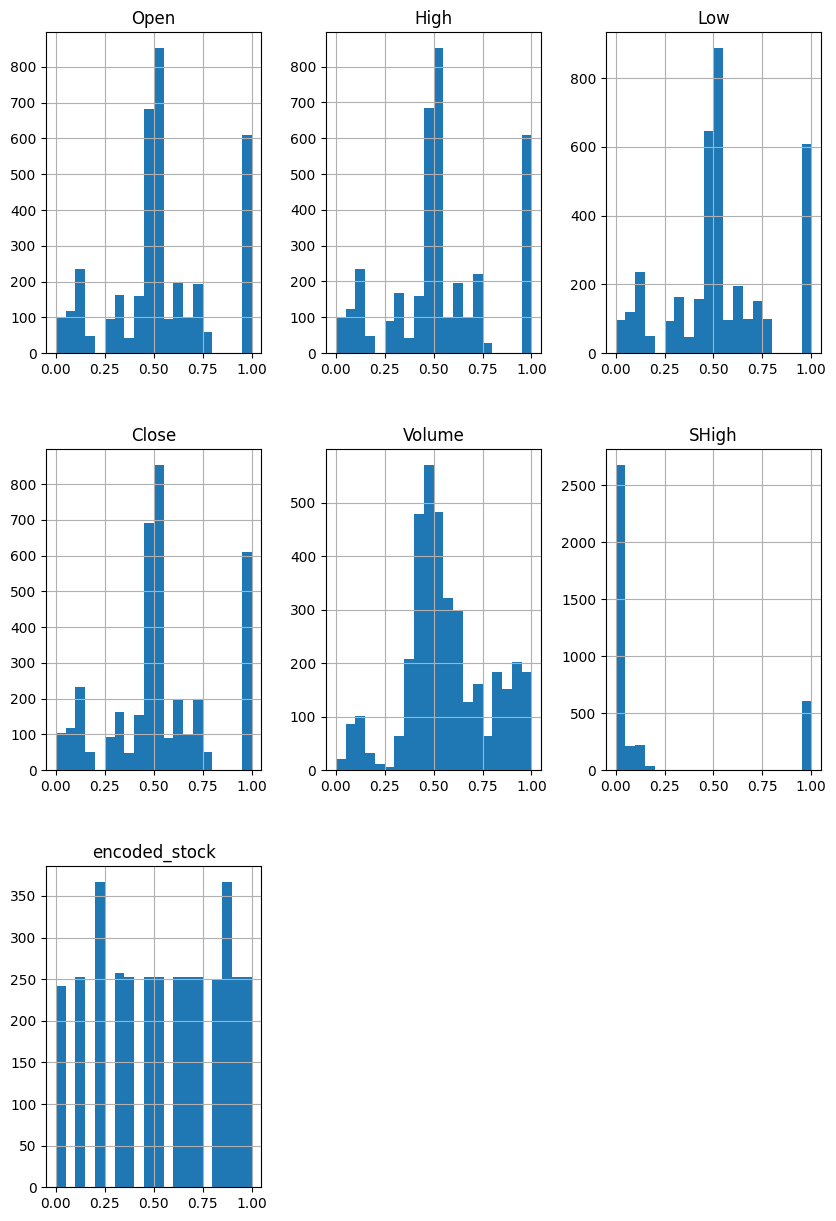

In [203]:
scaled_data.hist(bins=20,figsize=(10,15))

In [204]:
#scaled_data=pd.DataFrame(scaled_data)
scaled_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3751 entries, 0 to 3750
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Open           3751 non-null   float64
 1   High           3751 non-null   float64
 2   Low            3751 non-null   float64
 3   Close          3751 non-null   float64
 4   Volume         3751 non-null   float64
 5   SHigh          3751 non-null   float64
 6   encoded_stock  3751 non-null   float64
dtypes: float64(7)
memory usage: 205.3 KB


In [205]:
df

,Open,High,Low,Close,Volume,SHigh,encoded_stock
0,19.468005,19.613361,19.468005,19.516457,4253200,0.000066,6
1,19.303269,19.390482,19.196674,19.245127,6914100,0.000064,6
2,19.438932,19.574599,19.371100,19.555218,7591100,0.000066,6
3,19.642432,19.700574,19.564909,19.681192,5247500,0.000067,6
4,19.719955,19.942834,19.632741,19.836239,5516600,0.000070,6
...,...,...,...,...,...,...,...
3746,192.202545,200.831970,190.128769,199.599899,2387525186,0.001727,11
3747,199.589798,207.274643,194.241318,200.497559,3380872965,0.001787,11
3748,200.498245,208.827499,196.380768,200.356354,4106376694,0.001801,11
3749,200.358917,205.924194,195.321503,197.982361,3907611299,0.001774,11


In [206]:
sc=scaled_data.corr()

<Axes: >

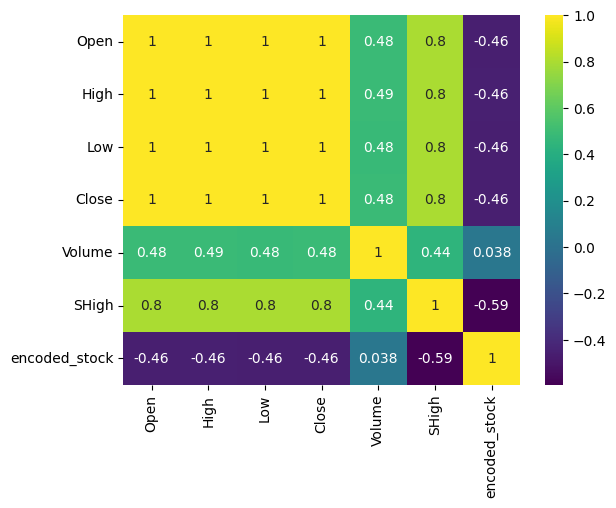

In [207]:
sns.heatmap(data=sc, annot=True, cmap="viridis")

In [208]:
scaled_data

,Open,High,Low,Close,Volume,SHigh,encoded_stock
0,0.105761,0.105442,0.108733,0.105256,0.390257,0.000793,0.542269
1,0.103880,0.102919,0.105624,0.102154,0.436078,0.000769,0.542269
2,0.105431,0.105005,0.107628,0.105695,0.444618,0.000789,0.542269
3,0.107733,0.106420,0.109831,0.107115,0.410361,0.000802,0.542269
4,0.108603,0.109110,0.110596,0.108848,0.415080,0.000829,0.542269
...,...,...,...,...,...,...,...
3746,0.517471,0.521285,0.518568,0.522148,0.835490,0.020382,0.878066
3747,0.522766,0.525681,0.521578,0.522776,0.852296,0.021071,0.878066
3748,0.523401,0.526716,0.523114,0.522677,0.861420,0.021237,0.878066
3749,0.523304,0.524774,0.522356,0.521008,0.859109,0.020927,0.878066


In [209]:
scaled_data.head()

,Open,High,Low,Close,Volume,SHigh,encoded_stock
0,0.105761,0.105442,0.108733,0.105256,0.390257,0.000793,0.542269
1,0.103880,0.102919,0.105624,0.102154,0.436078,0.000769,0.542269
2,0.105431,0.105005,0.107628,0.105695,0.444618,0.000789,0.542269
3,0.107733,0.106420,0.109831,0.107115,0.410361,0.000802,0.542269
4,0.108603,0.109110,0.110596,0.108848,0.415080,0.000829,0.542269


In [210]:
df

,Open,High,Low,Close,Volume,SHigh,encoded_stock
0,19.468005,19.613361,19.468005,19.516457,4253200,0.000066,6
1,19.303269,19.390482,19.196674,19.245127,6914100,0.000064,6
2,19.438932,19.574599,19.371100,19.555218,7591100,0.000066,6
3,19.642432,19.700574,19.564909,19.681192,5247500,0.000067,6
4,19.719955,19.942834,19.632741,19.836239,5516600,0.000070,6
...,...,...,...,...,...,...,...
3746,192.202545,200.831970,190.128769,199.599899,2387525186,0.001727,11
3747,199.589798,207.274643,194.241318,200.497559,3380872965,0.001787,11
3748,200.498245,208.827499,196.380768,200.356354,4106376694,0.001801,11
3749,200.358917,205.924194,195.321503,197.982361,3907611299,0.001774,11


In [211]:
model=OneClassSVM(nu=0.01,kernel='linear',gamma=0.1)

In [212]:
print(model.fit(scaled_data))

OneClassSVM(gamma=0.1, kernel='linear', nu=0.01)


In [213]:
predictions=model.predict(scaled_data)

In [214]:
predictions

array([1, 1, 1, ..., 1, 1, 1], shape=(3751,))

In [215]:
da=df.copy()

In [216]:
df

,Open,High,Low,Close,Volume,SHigh,encoded_stock
0,19.468005,19.613361,19.468005,19.516457,4253200,0.000066,6
1,19.303269,19.390482,19.196674,19.245127,6914100,0.000064,6
2,19.438932,19.574599,19.371100,19.555218,7591100,0.000066,6
3,19.642432,19.700574,19.564909,19.681192,5247500,0.000067,6
4,19.719955,19.942834,19.632741,19.836239,5516600,0.000070,6
...,...,...,...,...,...,...,...
3746,192.202545,200.831970,190.128769,199.599899,2387525186,0.001727,11
3747,199.589798,207.274643,194.241318,200.497559,3380872965,0.001787,11
3748,200.498245,208.827499,196.380768,200.356354,4106376694,0.001801,11
3749,200.358917,205.924194,195.321503,197.982361,3907611299,0.001774,11


In [217]:
da['Anomalies']=predictions

In [218]:
df

,Open,High,Low,Close,Volume,SHigh,encoded_stock
0,19.468005,19.613361,19.468005,19.516457,4253200,0.000066,6
1,19.303269,19.390482,19.196674,19.245127,6914100,0.000064,6
2,19.438932,19.574599,19.371100,19.555218,7591100,0.000066,6
3,19.642432,19.700574,19.564909,19.681192,5247500,0.000067,6
4,19.719955,19.942834,19.632741,19.836239,5516600,0.000070,6
...,...,...,...,...,...,...,...
3746,192.202545,200.831970,190.128769,199.599899,2387525186,0.001727,11
3747,199.589798,207.274643,194.241318,200.497559,3380872965,0.001787,11
3748,200.498245,208.827499,196.380768,200.356354,4106376694,0.001801,11
3749,200.358917,205.924194,195.321503,197.982361,3907611299,0.001774,11


In [219]:
da[da['Anomalies']==-1]


,Open,High,Low,Close,Volume,SHigh,encoded_stock,Anomalies
37,17.152001,17.297356,17.103548,17.277975,5967200,0.000045,6,-1
52,16.580266,16.599645,16.357386,16.415529,8845000,0.000039,6,-1
53,16.425222,16.560887,16.405840,16.444601,7426500,0.000039,6,-1
55,16.202340,16.367077,16.163580,16.250793,6966200,0.000037,6,-1
56,16.328317,16.386459,16.115127,16.347698,8716700,0.000037,6,-1
57,16.396149,16.463982,16.338007,16.405840,4035300,0.000038,6,-1
58,16.473673,16.512435,16.425222,16.444601,4209700,0.000038,6,-1
60,16.463982,16.609338,16.376768,16.560886,4739100,0.000039,6,-1
63,16.415530,16.512434,16.367077,16.396149,5923300,0.000038,6,-1
65,16.493053,16.599646,16.338007,16.522123,4019700,0.000039,6,-1


In [220]:
len(da[da['Anomalies']==-1])

37

In [221]:
df

,Open,High,Low,Close,Volume,SHigh,encoded_stock
0,19.468005,19.613361,19.468005,19.516457,4253200,0.000066,6
1,19.303269,19.390482,19.196674,19.245127,6914100,0.000064,6
2,19.438932,19.574599,19.371100,19.555218,7591100,0.000066,6
3,19.642432,19.700574,19.564909,19.681192,5247500,0.000067,6
4,19.719955,19.942834,19.632741,19.836239,5516600,0.000070,6
...,...,...,...,...,...,...,...
3746,192.202545,200.831970,190.128769,199.599899,2387525186,0.001727,11
3747,199.589798,207.274643,194.241318,200.497559,3380872965,0.001787,11
3748,200.498245,208.827499,196.380768,200.356354,4106376694,0.001801,11
3749,200.358917,205.924194,195.321503,197.982361,3907611299,0.001774,11


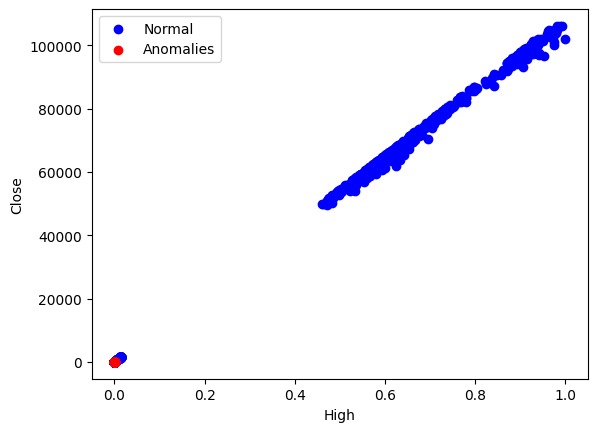

In [222]:
import matplotlib.pyplot as plt
plt.scatter(da.loc[predictions == 1, 'SHigh'], da.loc[predictions == 1, 'Close'], label='Normal', color='blue')
plt.scatter(da.loc[predictions == -1, 'SHigh'], da.loc[predictions == -1, 'Close'], label='Anomalies', color='red')
plt.xlabel('High')
plt.ylabel('Close')
plt.legend()

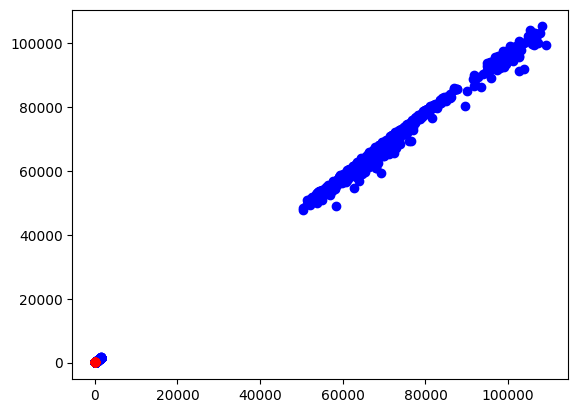

In [223]:
plt.scatter(da.loc[predictions == 1, 'High'], da.loc[predictions == 1, 'Low'], label='Normal', color='blue')
plt.scatter(da.loc[predictions == -1, 'High'], da.loc[predictions == -1, 'Low'], label='Anomalies', color='red')

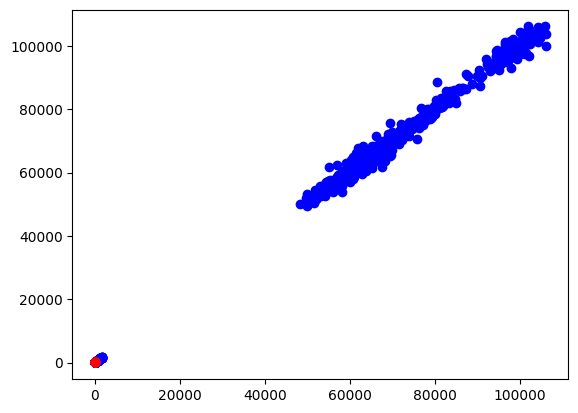

In [224]:
plt.scatter(da.loc[predictions == 1, 'Open'], da.loc[predictions == 1, 'Close'], label='Normal', color='blue')
plt.scatter(da.loc[predictions == -1, 'Open'], da.loc[predictions == -1, 'Close'], label='Anomalies', color='red')

In [225]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'SHigh', 'encoded_stock'], dtype='object')

In [226]:
# test_data = pd.DataFrame({
#     'Open': [230.175968, 185.500000, 697.000000, 163.811676, 155.402215],
#     'High': [231.148301, 186.779999, 701.000000, 167.950794, 156.569992],
#     'Low': [228.866282, 182.100006, 691.380005, 161.337951, 154.697673],
#     'Close': [230.433929, 183.250000, 697.119995, 164.503159, 156.502441],
#     'Volume': [3180800, 107343200, 2235300, 16702200, 3778200],
#     'SHigh': [0.002473, 0.001998, 0.007502, 0.001797, 0.001675],
#     'encoded_stock': [6, 13, 9, 6, 6]  
# })
test_data = pd.DataFrame({
    'Open': [230.175968, 185.500000, 697.000000, 163.811676, 155.402215, 64070.753906, 57430.347656],
    'High': [231.148301, 186.779999, 701.000000, 167.950794, 156.569992, 67622.757812, 58511.570312],
    'Low': [228.866282, 182.100006, 691.380005, 161.337951, 154.697673, 63825.851562, 55673.164062],
    'Close': [230.433929, 183.250000, 697.119995, 164.503159, 156.502441, 67234.171875, 57971.539062],
    'Volume': [3180800, 107343200, 2235300, 16702200, 3778200, 27206630673, 35627680312],
    'SHigh': [0.002473, 0.001998, 0.007502, 0.001797, 0.001675, 0.723746, 0.626232],
    'encoded_stock': [6, 13, 9, 6, 6, 2, 2]  
})

In [227]:
from sklearn.preprocessing import MinMaxScaler
test_data=pt.fit_transform(test_data)
scaler=MinMaxScaler()

scaled_data=scaler.fit_transform(test_data)
predictions=model.predict(scaled_data)



d:\final_model\tf\final_project\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning:

X does not have valid feature names, but OneClassSVM was fitted with feature names



In [228]:
test_data['Anomalies']=predictions

In [229]:
test_data

,Open,High,Low,Close,Volume,SHigh,encoded_stock,Anomalies
0,-0.572417,-0.578304,-0.567944,-0.572018,-0.946880,-0.640188,0.098067,-1
1,-0.768805,-0.772570,-0.776057,-0.780507,0.373862,-0.646520,1.600225,1
2,0.221589,0.218135,0.223163,0.219708,-1.126403,-0.574365,0.832343,1
3,-0.889266,-0.875284,-0.893582,-0.884974,-0.229376,-0.649205,0.098067,-1
4,-0.942010,-0.945346,-0.935623,-0.934652,-0.862996,-0.650837,0.098067,-1
5,1.481373,1.484430,1.482438,1.484166,1.381182,1.601783,-1.363384,1
6,1.469536,1.468939,1.467607,1.468275,1.410611,1.559331,-1.363384,1


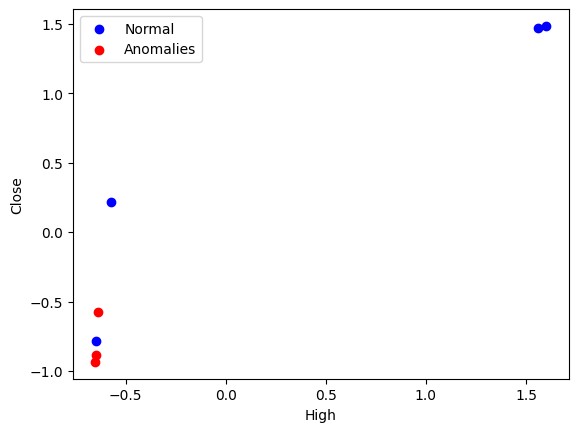

In [231]:
import matplotlib.pyplot as plt

plt.scatter(test_data.loc[predictions == 1, 'SHigh'], test_data.loc[predictions == 1, 'Close'], label='Normal', color='blue')
plt.scatter(test_data.loc[predictions == -1, 'SHigh'], test_data.loc[predictions == -1, 'Close'], label='Anomalies', color='red')
plt.xlabel('High')
plt.ylabel('Close')
plt.legend()
plt.show()
